In [1]:
from BDD import *

a = BDD('a', ZERO, ONE)
b = BDD('b', ZERO, ONE)

c = a.land(b)
d = a.lor(b)




In [42]:
import pydot
from IPython.display import Image

def plotbdd(bdd):
    G = pydot.Dot()
    G.set_type("digraph")
    for (i, x) in bdd.nodes():
        if x == 0:
            G.add_node(pydot.Node(str(i), label=str(x), shape="rectangle", color="red"))
        if x == 1:
            G.add_node(pydot.Node(str(i), label=str(x), shape="rectangle", color="blue"))
        else:
            G.add_node(pydot.Node(str(i), label=str(x)))
    
    for (a,b) in bdd.posedges():
        G.add_edge(pydot.Edge(str(a), str(b), color='blue'))
    for (a,b) in bdd.negedges():
        G.add_edge(pydot.Edge(str(a), str(b), color='red'))
        
    nodes = bdd.nodes()
    nodes0 = [i for (i,x) in nodes if x == 0]
    nodes1 = [i for (i,x) in nodes if x == 1]
    nodes2 = [i for (i,x) in nodes if x != 0 and x != 1]
#    G = nx.DiGraph()
    #G.add_nodes_from(i for (i,x) in nodes)
    #G.add_edges_from(bdd.negedges() + bdd.posedges())
    
    display(Image(G.create(prog='dot', format='png')))

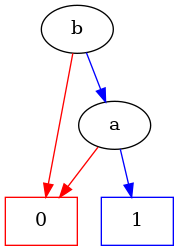

[(False, False, False),
 (False, True, False),
 (True, False, False),
 (True, True, True)]

In [43]:
plotbdd(c)

def testC(a, b):
    return (a and b)
    
[(a, b, testC(a,b)) for a in [False, True] for b in [False, True]]

In [ ]:
plotbdd(d)

def testD(a, b):
    return (a and b)
    
[(a, b, testD(a,b)) for a in [False, True] for b in [False, True]]

In [ ]:
e = d.land(c)
plotbdd(e)

def testE(a, b):
    return (a and b) and (a or b)
    
[(a, b, testE(a,b)) for a in [False, True] for b in [False, True]]

In [ ]:
plotbdd(e.simplify())